#CNN Intution

In [ ]:
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to hook into a specific layer and retrieve its output
def get_intermediate_layer_output(model, input_tensor, target_layer):
    outputs = []
    def hook(module, input, output):
        outputs.append(output)
    hook_handle = target_layer.register_forward_hook(hook)
    with torch.no_grad():
        model(input_tensor)
    hook_handle.remove()
    return outputs[0]

# Load the pretrained ResNet model
model = models.resnet152(pretrained=True)
model.eval()



print("Done")



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Done


In [ ]:

# Define a transformation to preprocess the input image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:

# Load and preprocess an example image
image = Image.open("/content/gr.jpg")

image.size

(857, 506)

In [ ]:

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension
input_batch.shape

torch.Size([1, 3, 224, 224])

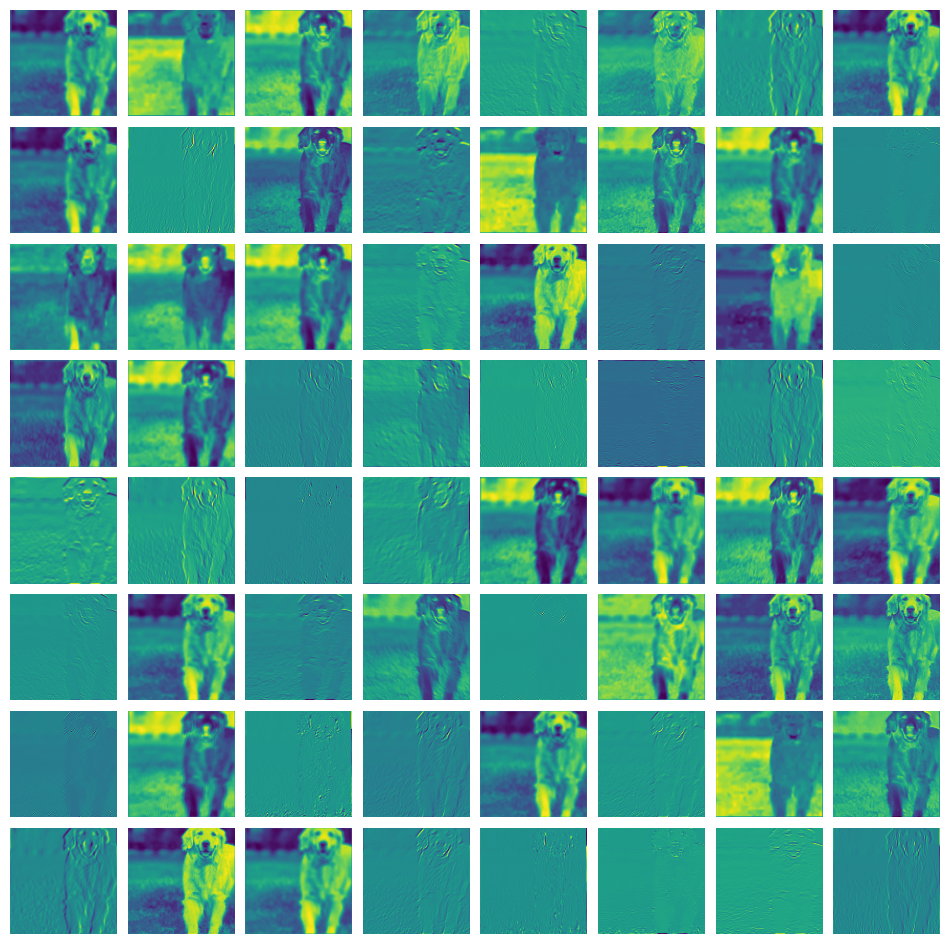

In [ ]:
# Specify the target layer from which you want to get the output
target_layer = model.conv1

# Get the output from the specified layer
intermediate_output = get_intermediate_layer_output(model, input_batch, target_layer)

# Visualize the feature maps from the intermediate layer
num_feature_maps = intermediate_output.shape[1]
# Set the figure size and adjust subplot parameters
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show 4x4 images
rows = 8
cols = 8
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(intermediate_output[0, i].cpu().numpy())
    plt.axis('off')

plt.show()

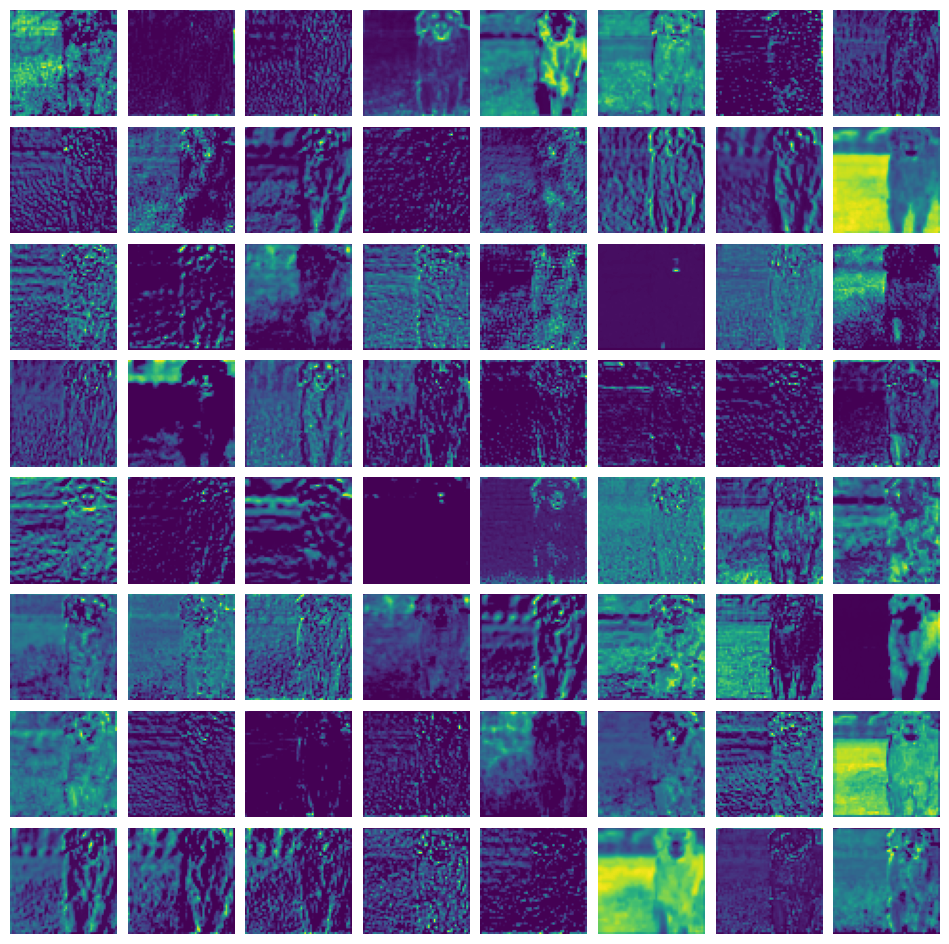

In [ ]:
# Specify the target layer from which you want to get the output
target_layer = model.layer1

# Get the output from the specified layer
intermediate_output = get_intermediate_layer_output(model, input_batch, target_layer)

# Visualize the feature maps from the intermediate layer
num_feature_maps = intermediate_output.shape[1]
# Set the figure size and adjust subplot parameters
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show 4x4 images
rows = 8
cols = 8
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(intermediate_output[0, i].cpu().numpy())
    plt.axis('off')

plt.show()

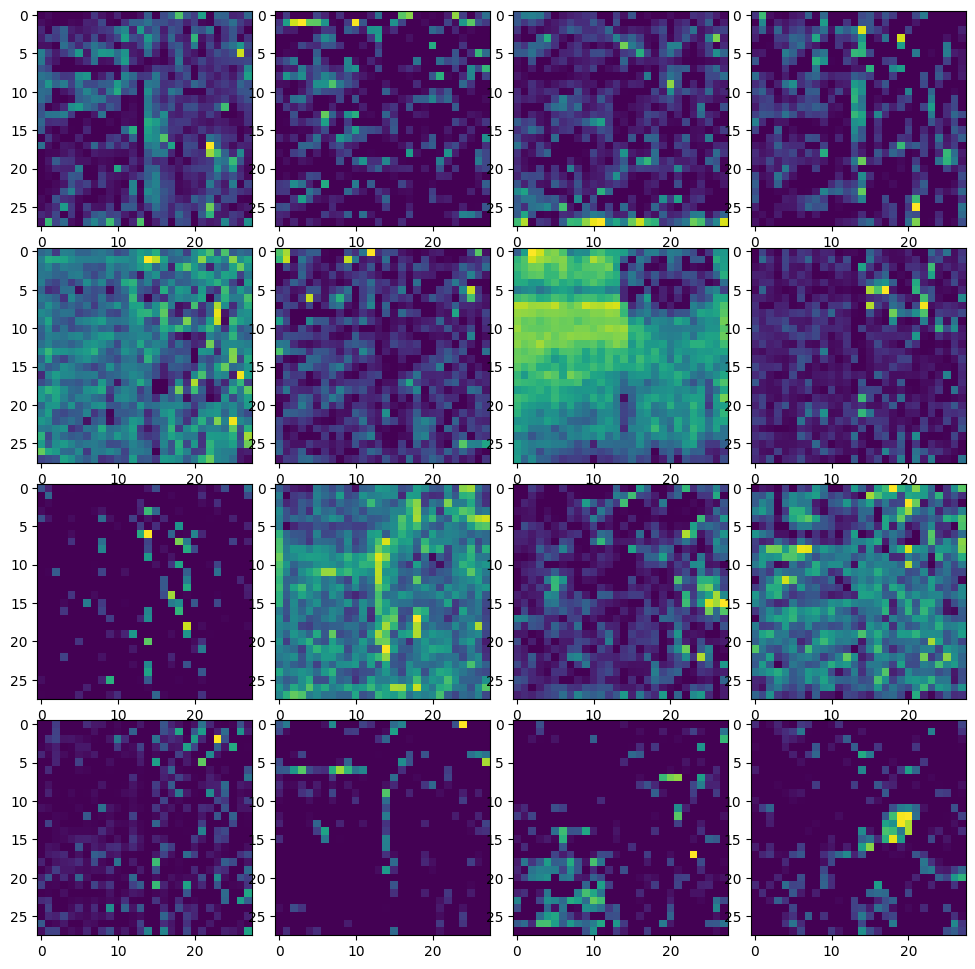

In [ ]:
# Specify the target layer from which you want to get the output
target_layer = model.layer2

# Get the output from the specified layer
intermediate_output = get_intermediate_layer_output(model, input_batch, target_layer)

# Visualize the feature maps from the intermediate layer
num_feature_maps = intermediate_output.shape[1]
# Set the figure size and adjust subplot parameters
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show 4x4 images
rows = 4
cols = 4
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(intermediate_output[0, i].cpu().numpy())


plt.show()

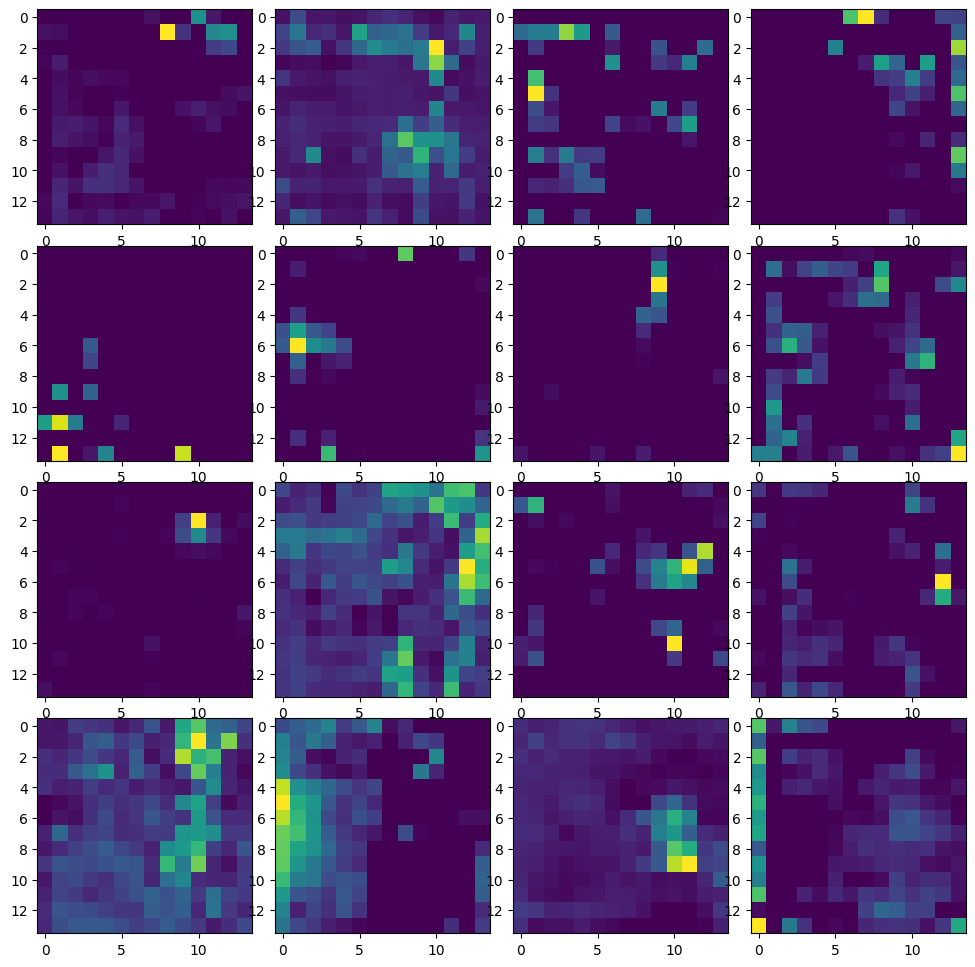

In [ ]:
# Specify the target layer from which you want to get the output
target_layer = model.layer3

# Get the output from the specified layer
intermediate_output = get_intermediate_layer_output(model, input_batch, target_layer)

# Visualize the feature maps from the intermediate layer
num_feature_maps = intermediate_output.shape[1]
# Set the figure size and adjust subplot parameters
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show 4x4 images
rows = 4
cols = 4
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(intermediate_output[0, i].cpu().numpy())


plt.show()

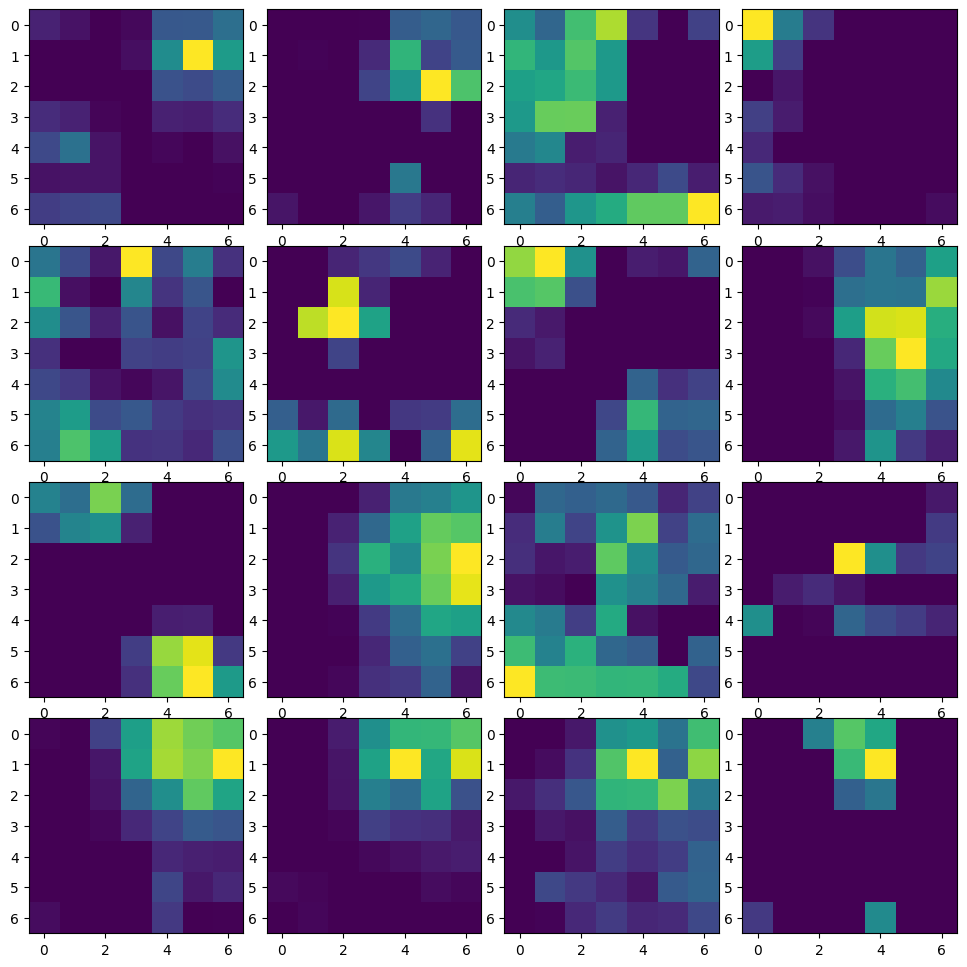

In [ ]:
# Specify the target layer from which you want to get the output
target_layer = model.layer4

# Get the output from the specified layer
intermediate_output = get_intermediate_layer_output(model, input_batch, target_layer)

# Visualize the feature maps from the intermediate layer
num_feature_maps = intermediate_output.shape[1]
# Set the figure size and adjust subplot parameters
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show 4x4 images
rows = 4
cols = 4
for i in range(rows * cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(intermediate_output[0, i].cpu().numpy())


plt.show()

In [ ]:
# Print the model to see its structure
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#Why Convolution Neural Networks?


## Understanding the Power of Convolutional Neural Networks (CNNs)
Let's explore why CNNs are used, why they are necessary, and how they outperform traditional Feedforward Neural Networks (FNNs) when its comes to computer vision.



## Benefits of Convolutional Neural Networks (CNNs)?

### Specialized for Image Data
- CNNs are specifically designed for processing and analyzing image data, making them ideal for tasks such as image classification, object detection, and image segmentation.
- They leverage the inherent spatial relationships present in images, capturing local patterns and structures effectively.

### Hierarchical Feature Learning
- CNNs employ a hierarchical architecture that automatically learns features at different levels of abstraction, from simple edges and textures to complex object shapes and structures.
- This hierarchical feature learning enables CNNs to extract meaningful representations from raw pixel values, leading to robust and discriminative features.

### Parameter Sharing
- CNNs utilize weight sharing through convolutional layers, where a single set of parameters (i.e., filters or kernels) is applied across the entire input image.
- Parameter sharing significantly reduces the number of model parameters, making CNNs more efficient and scalable, especially for large images and datasets.



## Why are Convolutional Neural Networks (CNNs) Required?

### Handling High-Dimensional Data
- Images are high-dimensional data structures with millions of pixels, making them challenging to process directly with traditional methods.
- CNNs are specifically designed to handle such high-dimensional data efficiently, thanks to their local connectivity and shared weights.

### Capturing Spatial Hierarchies
- Images contain rich spatial information, including edges, textures, and object arrangements, which play a crucial role in understanding visual content.
- CNNs excel at capturing spatial hierarchies through their convolutional and pooling layers, enabling them to learn complex visual representations.

### Dealing with Invariances
- Real-world images often exhibit variations in scale, rotation, translation, and illumination, making traditional pattern recognition approaches ineffective.
- CNNs inherently learn to be invariant to such transformations through their hierarchical feature learning and parameter sharing mechanisms, leading to robust performance across diverse conditions.



## Why are CNNs Better than Feedforward Neural Networks (FNNs)?

### Local Connectivity
- Unlike FNNs, which connect every neuron in one layer to every neuron in the next layer, CNNs enforce local connectivity patterns through convolutional operations.
- This local connectivity allows CNNs to focus on local features within the input space, enabling better feature extraction and reducing computational complexity.

### Parameter Sharing and Translation Invariance
- CNNs leverage parameter sharing across spatial locations, enabling them to detect features regardless of their location in the input image.
- This translation-invariant property makes CNNs more robust to spatial transformations and enhances their generalization ability compared to FNNs.

### Hierarchical Feature Learning
- CNNs employ a hierarchical architecture with multiple layers of convolutional and pooling operations, facilitating hierarchical feature learning.
- This hierarchical feature learning enables CNNs to automatically learn increasingly complex and abstract representations from raw pixel values, leading to superior performance in image-related tasks.

###Original Paper where CNN was introduced
https://vitalab.github.io/article/2017/03/29/lenet.html

##Core CNN Architecture

- A CNN has network/model has following steps/layers
  - Convolutional Layer
  - Pooling Layer
  - Normalization Layer
  - Some form of repeatation of above 3 and then
  - One or multiple Fully-Connected Layers to output

###Below is a diagram from the original paper.

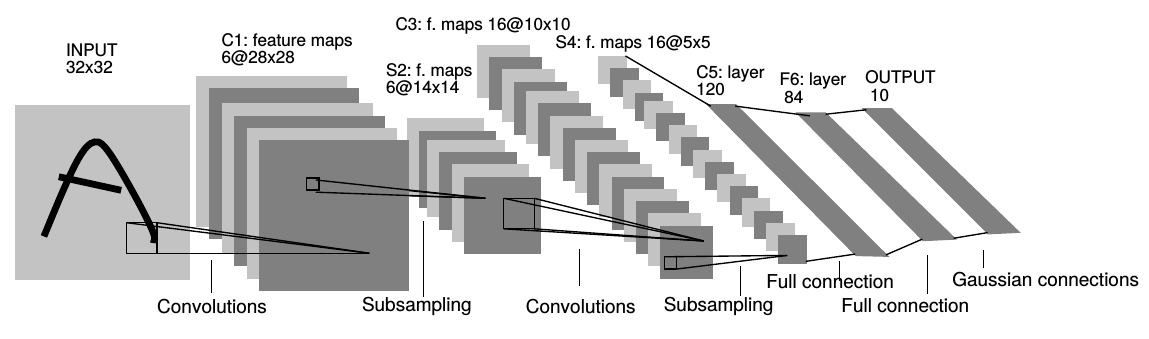

#CNN Playground
- https://ezyang.github.io/convolution-visualizer/
- https://cs231n.github.io/convolutional-networks/

#CNN for Handwritten Digit Recognition
##Architecture

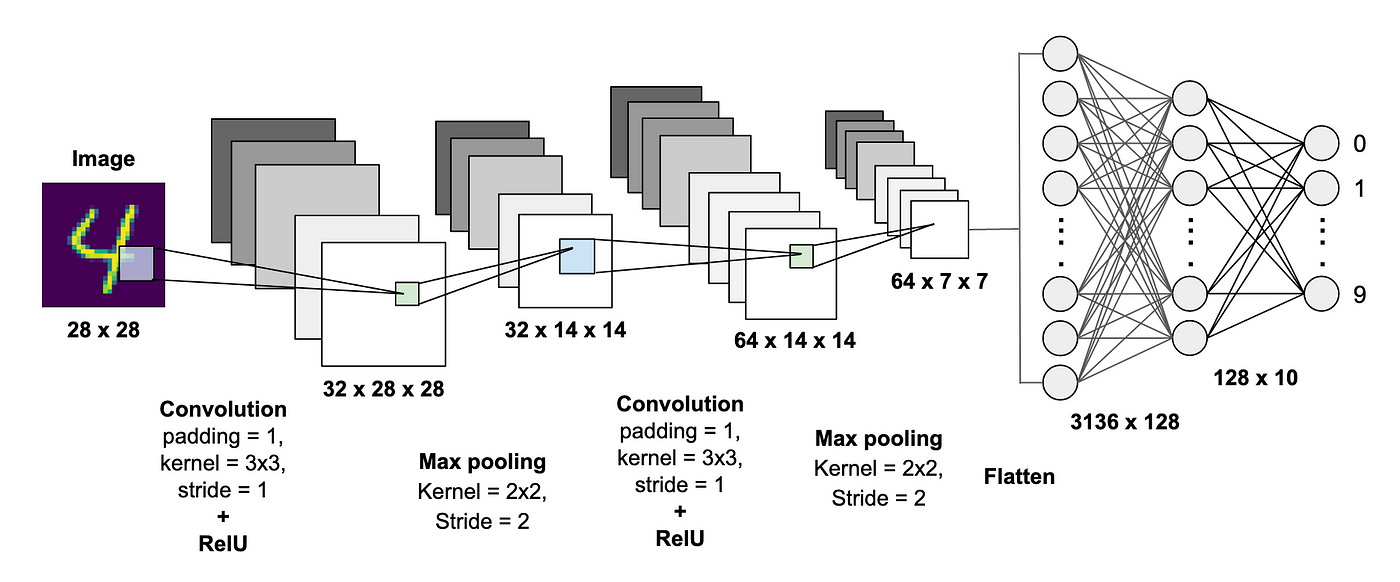


#Importing Libraries

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as T

# Defining hyper-parameters

In [ ]:
hp = {
  "input_size": 28*28, # 24x24= 764 pixels
  "hidden_size": 400, # number of hidden neurons
  "out_size": 10, # number of classes [0, 9] digits
  "epochs": 10, # how many times will we pas sour entire dataset of 60k images to our network to learn from it.
  "batch_size": 100, # for one iteration, how many images we will send to the network in one go
  "learning_rate": 0.001, # how fast the model will learn
  "mean_grey": 0.1307,
  "stddev_grey": 0.3081
  }

hp


{'input_size': 784,
 'hidden_size': 400,
 'out_size': 10,
 'epochs': 10,
 'batch_size': 100,
 'learning_rate': 0.001,
 'mean_grey': 0.1307,
 'stddev_grey': 0.3081}

#Downloading data from MNIST dataset

In [ ]:
# input[channel] =  (input[channel]-mean[channel]) / std[channel]
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Normalize( (hp["mean_grey"], ), (hp["stddev_grey"], ))
    ]
)
transforms

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)

In [ ]:
train_dataset = datasets.MNIST(root="./data",
                               train=True,
                               transform=transforms,
                               download=True)

test_dataset = datasets.MNIST(root="./data",
                               train=False,
                               transform=transforms,
                               download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:02<00:00, 4566067.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 134557.09it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:01<00:00, 1266968.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 9927320.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#Importing Dataloader
- Dataloader will help us get the raw images into iterable format
- This iterable format of data will be used to send to the network for learning

In [ ]:
from torch.utils.data import DataLoader as DL

In [ ]:
train_loader = DL(dataset=train_dataset,
                  batch_size=hp["batch_size"],
                  shuffle=True)

test_loader = DL(dataset=train_dataset,
                  batch_size=hp["batch_size"],
                  shuffle=True)


In [ ]:
# there are two ways of getting data out of the loader
# 1 using for loop
for train_features, train_labels in train_loader:
  print(train_features.shape, train_labels.shape)
  break

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [ ]:
# 2 using for iter and next
train_features, train_labels = next(iter(train_loader))

In [ ]:
train_features.shape, train_labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

#Visualizing the data

In [ ]:
import matplotlib.pyplot as plt


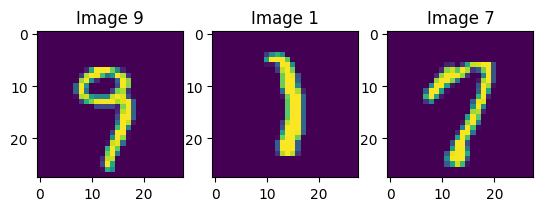

In [ ]:
num_img = 3
fig, axs = plt.subplots(1, num_img)

for i in range(0, num_img):
    img = train_features[i]
    img = torch.squeeze(img, dim=0)

    # denormalize the image
    img = img * hp["stddev_grey"] + hp["mean_grey"]

    axs[i].imshow(img)

    # Convert label to int and then to string before setting the title
    label = int(train_labels[i].detach().cpu().numpy())
    axs[i].set_title('Image ' + str(label))

plt.show()




#Designing the Neural Network (CNN)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # formula for paddings
    # same padding -> inputsize = output size
    # same size we need padding = (filter_size/kernel_size-1) / 2
    # (3-1)/2 =1

    #first CNN layer
    # input image = (batch_size, 1, 28, 28) -> (batch_size, 32, 28, 28)
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)



    # output size of each of 32 feature maps = (input_size-filter_size + 2*padding) /stride + 1
    # output size = (28-3+2*1)/1 + 1 = 28
    #output size = (32, 28, 28)


    self.batchNorm1 = nn.BatchNorm2d(32)  # this sholud match the feature map/out_channels
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2)  # with kernel size=2
    # the output size = 28/2 = 14

    #second CNN layer
    self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    # output size of each of 32 feature maps = (input_size-filter_size + 2*padding) /stride + 1
    # output size = (14-3+2*1)/1 + 1 = 14
    #output size = (64, 14, 14)
    self.batchNorm2 = nn.BatchNorm2d(64)  # this sholud match the feature map/out_channels
    #self.relu = nn.ReLU()
    #self.maxpool = nn.MaxPool2d(kernel_size=2)  # with kernel size=2
    # the output size = 14/2 = 7

    # feed forward layer

    self.fc1 = nn.Linear(3136, 600) #7*7*64
    self.dropout = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(600, 10)


  def forward(self, x):

    #first cnn layer
    #(bathc_size, 1, 28, 28) - > #(batch_size, 32, 28, 28)
    out = self.cnn1(x)

    out = self.batchNorm1(out)
    out = self.relu(out)

    #(bathc_size, 32, 28, 28) - > #(batch_size, 32, 14, 14)
    out = self.maxpool(out)

    #ssecond cnn layer
    #(bathc_size, 32, 14, 14) - > #(batch_size, 64, 14, 14)
    out = self.cnn2(out)
    out = self.batchNorm2(out)
    out = self.relu(out)

    #(bathc_size, 32, 14, 14) - > #(batch_size, 64, 7, 7)
    out = self.maxpool(out)


    out = out.view(out.shape[0], -1)
    # print(out.shape)
    # feed forward layer

    #(bathc_size, 3136) - > #(batch_size, 128)
    out = self.fc1(out)
    # print(out.shape)
    out = self.relu(out)

    out = self.dropout(out)

    #(bathc_size, 128) - > #(batch_size, 10)
    out = self.fc2(out)

    return out


In [ ]:
# Check if CUDA is available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Instantiate the network. Make sure to use appropriate input_size, hidden_size and out_size
def getFreshModel():
  net = CNN()
  net.to(device)
  return net

net = getFreshModel()
# Send the model to the device


#Visualizing the Model

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

In [ ]:
train_features.shape

torch.Size([100, 1, 28, 28])

Size torch.Size([100, 1, 28, 28])


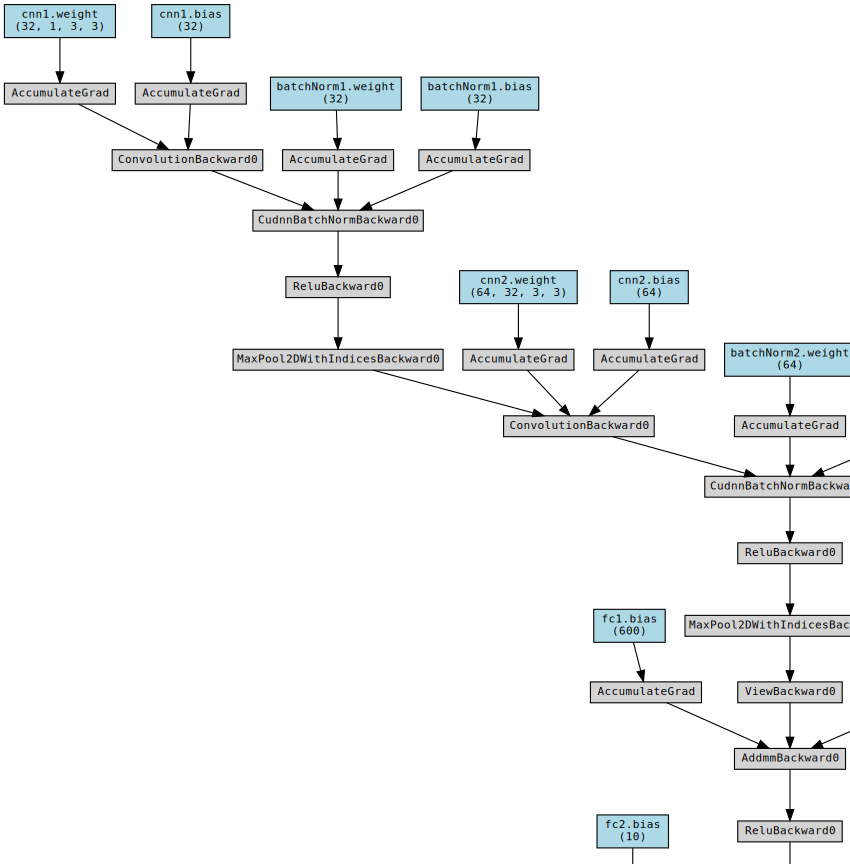

In [ ]:
import torch
from torchviz import make_dot

# To visualize the model, we need to create a dummy input
# The dummy input size should match with the input size of the model
dummy_input = train_features.to(device)

print("Size", dummy_input.shape)
# dummy_input  = dummy_input.view(-1, 28*28)
# We use the forward pass on the dummy input
out = net(dummy_input)

# Generate the graph using the dummy input to visualize the architecture
dot = make_dot(out, params=dict(net.named_parameters()))
dot.render("model_architecture.gv", view=True)

# Display the graph
dot


In [ ]:
out.shape

torch.Size([100, 10])

#Visualizing the model summary

In [ ]:
from torchsummary import summary

In [ ]:
summary(net, input_size=(1, 28, 28), batch_size=hp["batch_size"])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [100, 32, 28, 28]             320
       BatchNorm2d-2          [100, 32, 28, 28]              64
              ReLU-3          [100, 32, 28, 28]               0
         MaxPool2d-4          [100, 32, 14, 14]               0
            Conv2d-5          [100, 64, 14, 14]          18,496
       BatchNorm2d-6          [100, 64, 14, 14]             128
              ReLU-7          [100, 64, 14, 14]               0
         MaxPool2d-8            [100, 64, 7, 7]               0
            Linear-9                 [100, 600]       1,882,200
             ReLU-10                 [100, 600]               0
          Dropout-11                 [100, 600]               0
           Linear-12                  [100, 10]           6,010
Total params: 1,907,218
Trainable params: 1,907,218
Non-trainable params: 0
---------------------------

#Loss function and Optimizer
- Refer to this video if you are not sure how Loss Functions work
- Refer to this video if you are not sure how Optimizers work

In [ ]:
#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
# note that CrossEntropyLoss comes with a Softmax layer therefore we dont have to create that layer in our Net model
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
net = getFreshModel()
optim_fn = torch.optim.Adam(net.parameters(),
                            lr=hp["learning_rate"])
optim_fn

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
for param in net.parameters():
  print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([32, 1, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([32])
<class 'torch.nn.parameter.Parameter'> torch.Size([32])
<class 'torch.nn.parameter.Parameter'> torch.Size([32])
<class 'torch.nn.parameter.Parameter'> torch.Size([64, 32, 3, 3])
<class 'torch.nn.parameter.Parameter'> torch.Size([64])
<class 'torch.nn.parameter.Parameter'> torch.Size([64])
<class 'torch.nn.parameter.Parameter'> torch.Size([64])
<class 'torch.nn.parameter.Parameter'> torch.Size([600, 3136])
<class 'torch.nn.parameter.Parameter'> torch.Size([600])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 600])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


#Training the model

In [ ]:
# Initialize variables to track the total number of correctly predicted samples during training
total_train = 0
correct_train = 0

# Obtain a fresh instance of the neural network model
model = getFreshModel()

# Define the optimizer for updating the model parameters using the Adam optimizer with specified learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=hp["learning_rate"])


#Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#Training
for epoch in range(hp["epochs"]):
    #Reset these below variables to 0 at the begining of every epoch
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train()

    for i, (inputs, labels) in enumerate(train_loader):


        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        iter_loss += loss.item()         # Accumulate the loss
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient)
        loss.backward()                 # Backpropagation
        optimizer.step()                # Update the weights

        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        iterations += 1

    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))

    #Testing
    testing_loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation mode


    total = 0
    for i, (inputs, labels) in enumerate(test_loader):


        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, labels) # Calculate the loss
        testing_loss += loss.item()
        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)

        # Update the total count of samples
        total += labels.size(0)
        correct += (predicted == labels).sum()

        iterations += 1

    # Record the Testing loss
    test_loss.append(testing_loss/iterations)
    # Record the Testing accuracy
    test_accuracy.append((100 * correct / total))

    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'
           .format(epoch+1, hp["epochs"], train_loss[-1], train_accuracy[-1],
             test_loss[-1], test_accuracy[-1]))

Epoch 1/10, Training Loss: 0.179, Training Accuracy: 94.537, Testing Loss: 0.047, Testing Acc: 98.535
Epoch 2/10, Training Loss: 0.068, Training Accuracy: 97.877, Testing Loss: 0.054, Testing Acc: 98.363
Epoch 3/10, Training Loss: 0.053, Training Accuracy: 98.273, Testing Loss: 0.023, Testing Acc: 99.225
Epoch 4/10, Training Loss: 0.046, Training Accuracy: 98.557, Testing Loss: 0.019, Testing Acc: 99.387
Epoch 5/10, Training Loss: 0.039, Training Accuracy: 98.748, Testing Loss: 0.013, Testing Acc: 99.597
Epoch 6/10, Training Loss: 0.031, Training Accuracy: 99.010, Testing Loss: 0.011, Testing Acc: 99.655
Epoch 7/10, Training Loss: 0.027, Training Accuracy: 99.175, Testing Loss: 0.013, Testing Acc: 99.605
Epoch 8/10, Training Loss: 0.024, Training Accuracy: 99.243, Testing Loss: 0.008, Testing Acc: 99.740
Epoch 9/10, Training Loss: 0.020, Training Accuracy: 99.370, Testing Loss: 0.008, Testing Acc: 99.723
Epoch 10/10, Training Loss: 0.021, Training Accuracy: 99.300, Testing Loss: 0.005,

#Visualizing the training

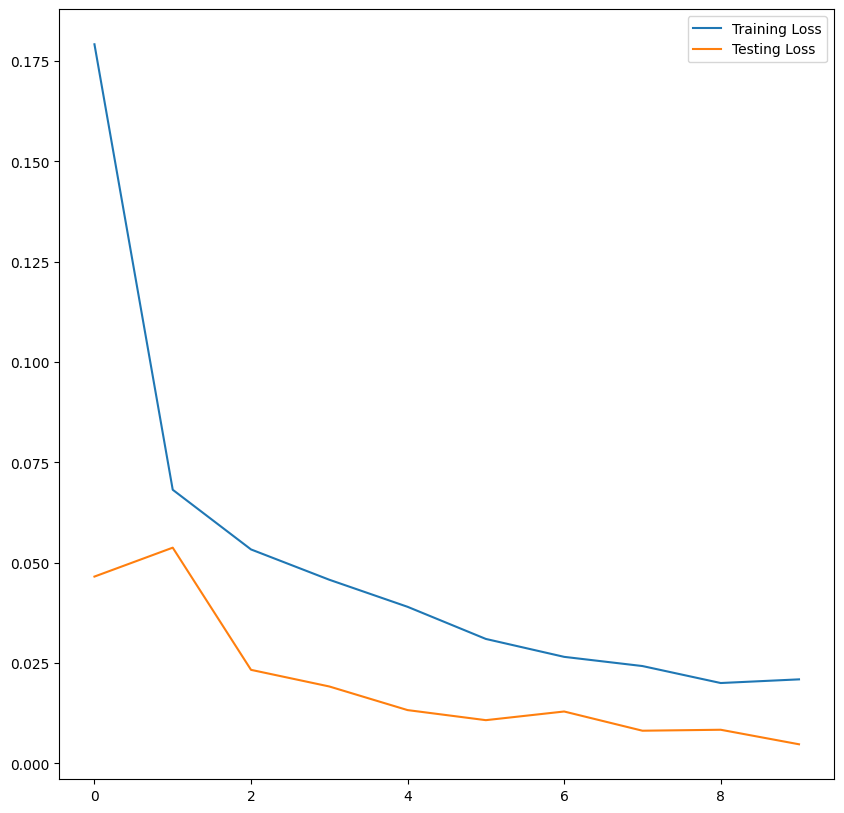

In [ ]:
# Loss
f = plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.show()

In [ ]:
ta = [x.detach().cpu().numpy() for x in train_accuracy]
ta1 = [x.detach().cpu().numpy() for x in test_accuracy]

ta

[array(94.53667, dtype=float32),
 array(97.87667, dtype=float32),
 array(98.27333, dtype=float32),
 array(98.55667, dtype=float32),
 array(98.74834, dtype=float32),
 array(99.01, dtype=float32),
 array(99.175, dtype=float32),
 array(99.24333, dtype=float32),
 array(99.37, dtype=float32),
 array(99.3, dtype=float32)]

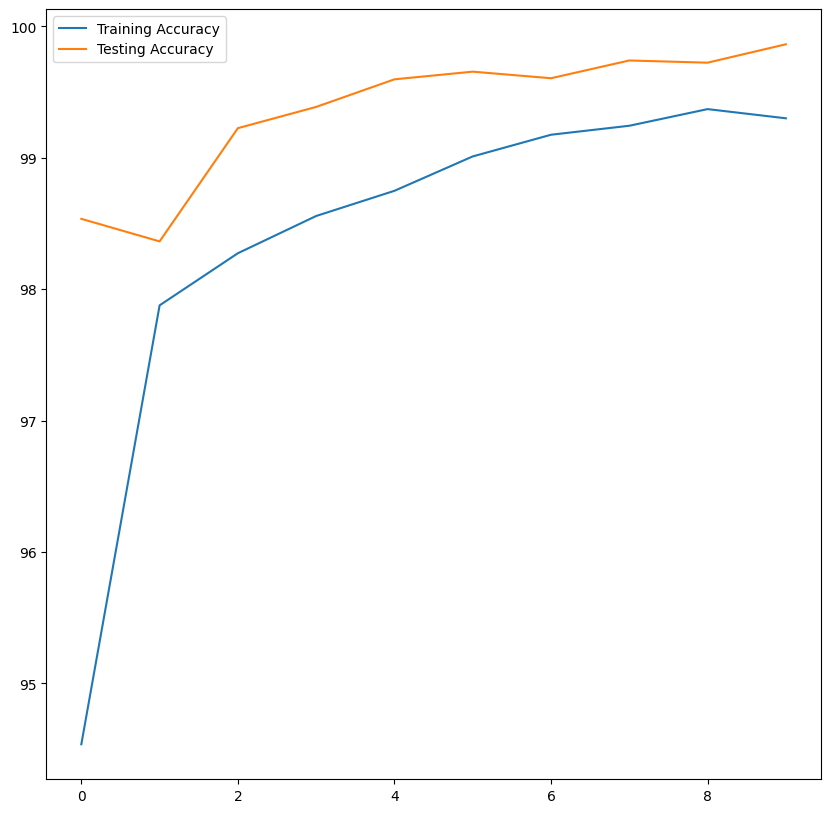

In [ ]:
# Accuracy
f = plt.figure(figsize=(10, 10))
plt.plot(ta, label='Training Accuracy')
plt.plot(ta1, label='Testing Accuracy')
plt.legend()
plt.show()

#Testing the model

In [ ]:
t1, t2 = next(iter(test_loader))

In [ ]:
t1[30].shape

torch.Size([1, 28, 28])

In [ ]:
img = test_dataset[30][0].resize_((1, 1, 28, 28))   #(batch_size,channels,height,width)
label = test_dataset[30][1]

model.eval()
model = model.to(device)
img = img.to(device)

output = model(img)
_, predicted = torch.max(output,1)
print("Prediction is: {}".format(predicted.item()))
print("Actual is: {}".format(label))

Prediction is: 3
Actual is: 3


In [ ]:
im_new = img[0][0].detach().cpu().numpy()

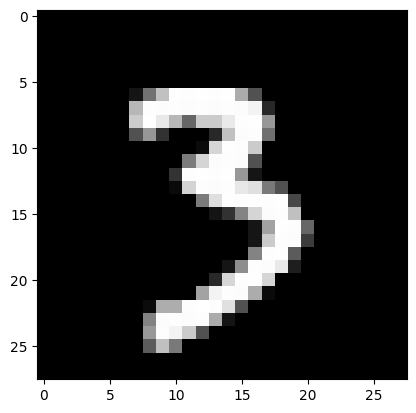

In [ ]:
plt.imshow(im_new, cmap="gray")